Resizing all images to: 199x193


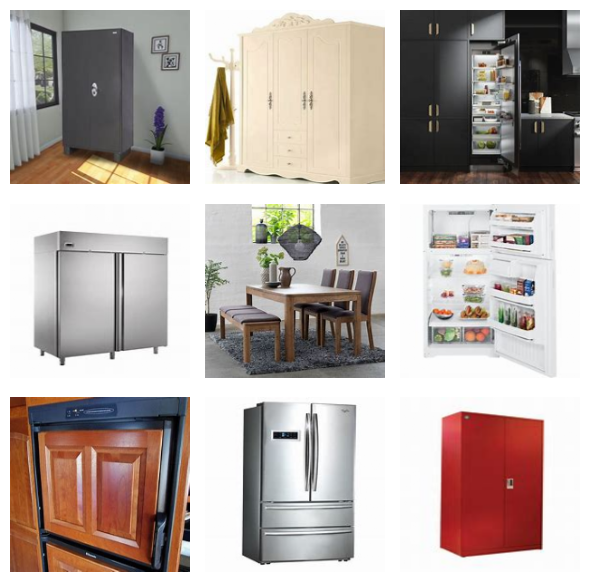

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random

MAIN_IMAGE_DIR = "furniture"
category_folders = [os.path.join(MAIN_IMAGE_DIR, folder) for folder in os.listdir(MAIN_IMAGE_DIR) if os.path.isdir(os.path.join(MAIN_IMAGE_DIR, folder))]

# get all images from each folder within the main furniture directory
def get_all_image_paths(category_folders):
    image_paths = []
    for folder in category_folders:
        image_paths.extend(glob(os.path.join(folder, "*.jpeg")))
    return image_paths

image_paths = get_all_image_paths(category_folders)

# get dimenstions of all images
def get_image_dimensions(image_paths):
    dimensions = []
    for path in image_paths:
        img = cv2.imread(path)  
        if img is not None:
            h, w, _ = img.shape
            dimensions.append((h, w))
    return dimensions

dimensions = get_image_dimensions(image_paths)

# get avg dimensions to get what to resize everything to
avg_height = int(np.mean([dim[0] for dim in dimensions]))
avg_width = int(np.mean([dim[1] for dim in dimensions]))

print(f"Resizing all images to: {avg_width}x{avg_height}")

# preprocessing
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)  
    img = cv2.resize(img, target_size)  # resizing
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = img.astype(np.float32) / 255.0  # normalizing
    return img

processed_images = [preprocess_image(path, (avg_width, avg_height)) for path in image_paths]

# Select a random grid of images for visualization
def visualize_grid(images, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(6, 6))
    selected_images = random.sample(images, rows * cols)
    
    for i, ax in enumerate(axes.flat):
        if i < len(selected_images):
            ax.imshow(selected_images[i])
            ax.axis("off")
    plt.tight_layout()
    plt.show()

visualize_grid(processed_images, rows=3, cols=3)


In [8]:
for i, img in enumerate(processed_images):
    print(f"Image {i+1} shape: {img.shape}")

Image 1 shape: (193, 199, 3)
Image 2 shape: (193, 199, 3)
Image 3 shape: (193, 199, 3)
Image 4 shape: (193, 199, 3)
Image 5 shape: (193, 199, 3)
Image 6 shape: (193, 199, 3)
Image 7 shape: (193, 199, 3)
Image 8 shape: (193, 199, 3)
Image 9 shape: (193, 199, 3)
Image 10 shape: (193, 199, 3)
Image 11 shape: (193, 199, 3)
Image 12 shape: (193, 199, 3)
Image 13 shape: (193, 199, 3)
Image 14 shape: (193, 199, 3)
Image 15 shape: (193, 199, 3)
Image 16 shape: (193, 199, 3)
Image 17 shape: (193, 199, 3)
Image 18 shape: (193, 199, 3)
Image 19 shape: (193, 199, 3)
Image 20 shape: (193, 199, 3)
Image 21 shape: (193, 199, 3)
Image 22 shape: (193, 199, 3)
Image 23 shape: (193, 199, 3)
Image 24 shape: (193, 199, 3)
Image 25 shape: (193, 199, 3)
Image 26 shape: (193, 199, 3)
Image 27 shape: (193, 199, 3)
Image 28 shape: (193, 199, 3)
Image 29 shape: (193, 199, 3)
Image 30 shape: (193, 199, 3)
Image 31 shape: (193, 199, 3)
Image 32 shape: (193, 199, 3)
Image 33 shape: (193, 199, 3)
Image 34 shape: (19